In [3]:
# Import library yang diperlukan
import pandas as pd

# Memuat dataset
file_path = '/content/data 3.csv'  # Ganti dengan nama file dataset Anda
data = pd.read_csv(file_path)  # Membaca file CSV ke dalam DataFrame

# Menampilkan beberapa baris awal dataset untuk memahami struktur data
data.head()  # Menampilkan 5 baris pertama dari dataset


,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [4]:
# Informasi dasar dataset
data_info = {
    "Shape": data.shape,  # Menampilkan dimensi dataset (jumlah baris dan kolom)
    "Missing Values": data.isnull().sum().sum(),  # Menghitung total nilai yang hilang
    "Duplicate Rows": data.duplicated().sum(),  # Menghitung jumlah baris duplikat
    "Target Value Counts": data['Result'].value_counts().to_dict()  # Distribusi nilai target
}

# Menampilkan informasi dasar dataset
data_info  # Menampilkan hasil eksplorasi awal


{'Shape': (29332, 87),
 'Missing Values': 0,
 'Duplicate Rows': 21841,
 'Target Value Counts': {1: 14700, 0: 14632}}

In [5]:
# Menghapus baris duplikat
data_cleaned = data.drop_duplicates()  # Menghapus baris duplikat dari dataset

# Memverifikasi dimensi setelah pembersihan
data_cleaned.shape  # Menampilkan dimensi dataset setelah duplikasi dihapus


(7491, 87)

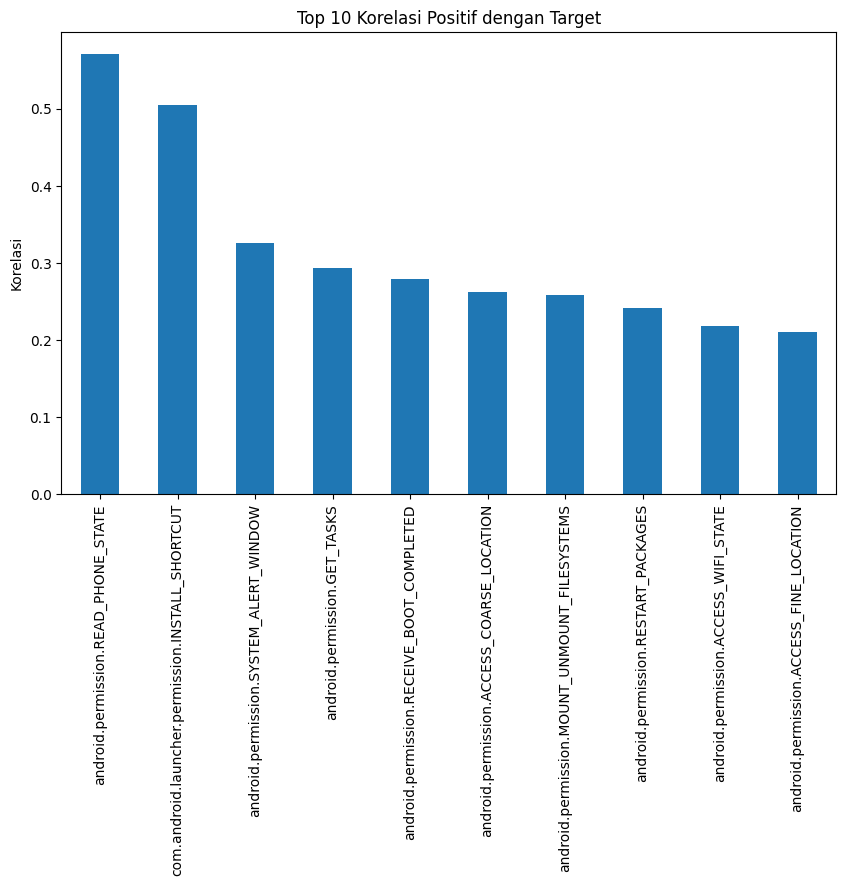

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data_cleaned.corr()  # Menghitung korelasi antar fitur

# Visualisasi korelasi fitur terhadap target
plt.figure(figsize=(10, 6))
correlation_with_target = correlation_matrix['Result'].sort_values(ascending=False)  # Korelasi dengan target
correlation_with_target[1:11].plot(kind='bar', title='Top 10 Korelasi Positif dengan Target')  # 10 Korelasi Teratas
plt.ylabel('Korelasi')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = data_cleaned.drop(columns=['Result'])  # Semua kolom kecuali target
y = data_cleaned['Result']  # Kolom target

# Membagi data ke dalam data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Melakukan standarisasi fitur
scaler = StandardScaler()  # Inisialisasi scaler
X_train_scaled = scaler.fit_transform(X_train)  # Standarisasi data latih
X_test_scaled = scaler.transform(X_test)  # Standarisasi data uji


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Inisialisasi model
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Grid untuk hyperparameter tuning
param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Decision Tree': {'classifier__max_depth': [3, 5, 10], 'classifier__min_samples_split': [2, 5, 10]},
    'k-NN': {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']},
    'XGBoost': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [3, 5, 10]}
}

# Looping untuk setiap model
results = {}
for name, model in classifiers.items():
    pipeline = Pipeline([('scaler', scaler), ('classifier', model)])  # Pipeline preprocessing + model
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)  # Tuning
    grid_search.fit(X_train, y_train)  # Melatih model dengan Grid Search
    y_pred = grid_search.best_estimator_.predict(X_test)  # Prediksi menggunakan model terbaik
    results[name] = {
        'Best Params': grid_search.best_params_,  # Hyperparameter terbaik
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)  # Hasil evaluasi
    }

# Menampilkan hasil evaluasi
results_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': result['Classification Report']['accuracy'],
        'Best Params': result['Best Params']
    } for model_name, result in results.items()
])
results_df


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,Best Params
0,Logistic Regression,0.934623,{'classifier__C': 0.1}
1,Decision Tree,0.907939,"{'classifier__max_depth': 10, 'classifier__min..."
2,k-NN,0.904603,"{'classifier__n_neighbors': 5, 'classifier__we..."
3,XGBoost,0.941294,"{'classifier__max_depth': 5, 'classifier__n_es..."
